In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=12,6

#### k-means

In [2]:
cd = pd.read_csv('clustering_data_1.csv')

In [3]:
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


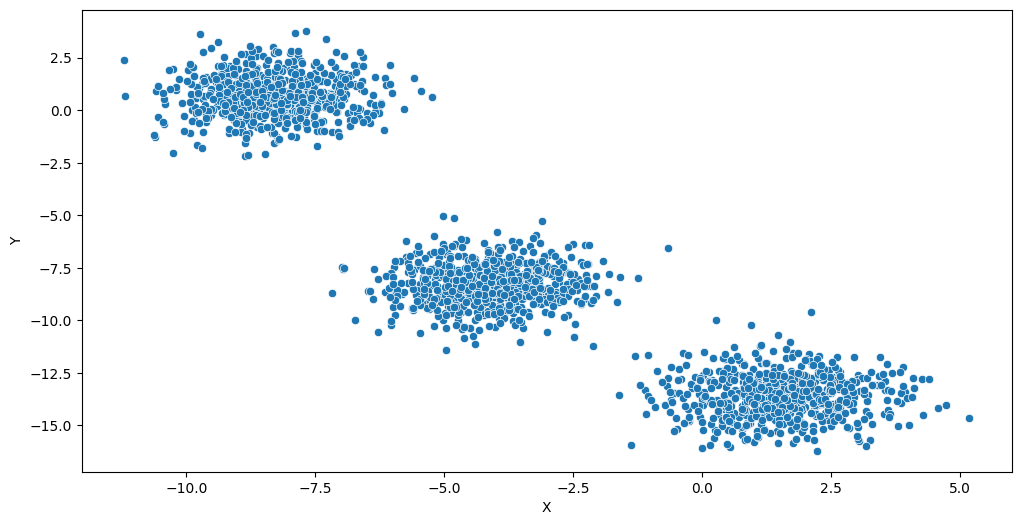

In [4]:
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(x='X',y='Y',data=cd)
plt.show()

In [5]:
Kmean=KMeans(n_clusters=2)

In [6]:
Kmean.fit(cd)

KMeans(n_clusters=2)

In [7]:
cluster_assignment=Kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

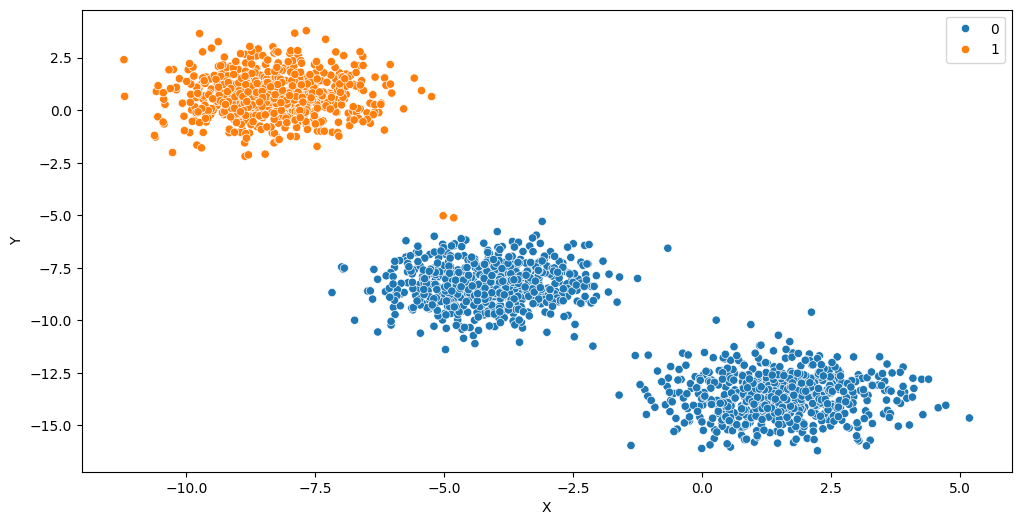

In [8]:
sns.scatterplot(x='X', y='Y', data=cd, hue=cluster_assignment)


In [9]:
Kmean=KMeans(n_clusters=3)

In [10]:
Kmean.fit(cd)

KMeans(n_clusters=3)

In [11]:
cluster_assignment=Kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

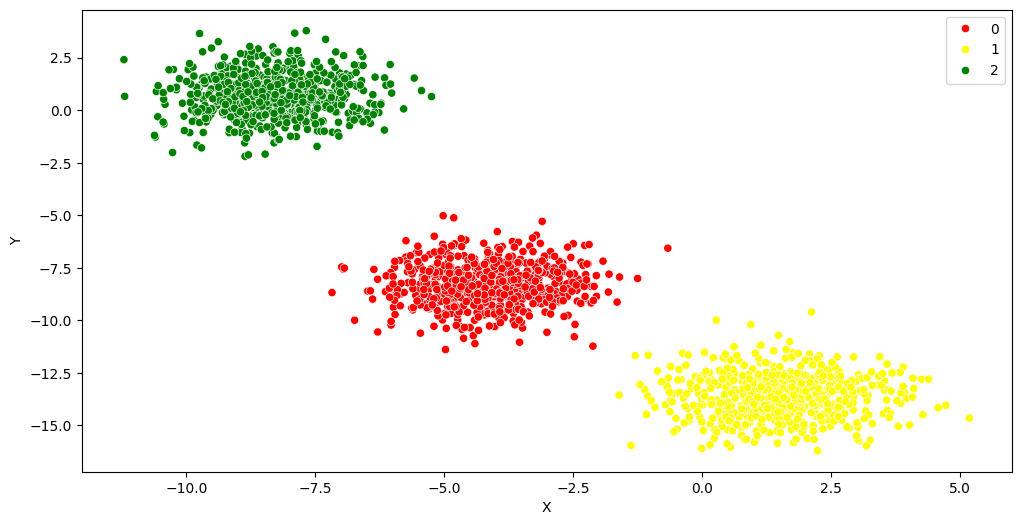

In [12]:
sns.scatterplot(x='X', y='Y', data=cd, hue=cluster_assignment,palette=['red','yellow','green'])

In [13]:
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


In [14]:
y_pred =  Kmean.fit_predict(cd[["X","Y"]])
y_pred

array([1, 2, 1, ..., 0, 0, 1])

In [15]:
cd['predict_cluster']=y_pred
cd.head()

,X,Y,predict_cluster
0,-8.659655,1.344655,1
1,-4.765612,-8.923286,2
2,-8.744243,-0.576567,1
3,1.805738,-13.008058,0
4,-4.798434,-8.945116,2


In [16]:
df1=cd[cd.predict_cluster==0]
df2=cd[cd.predict_cluster==1]
df3=cd[cd.predict_cluster==2]


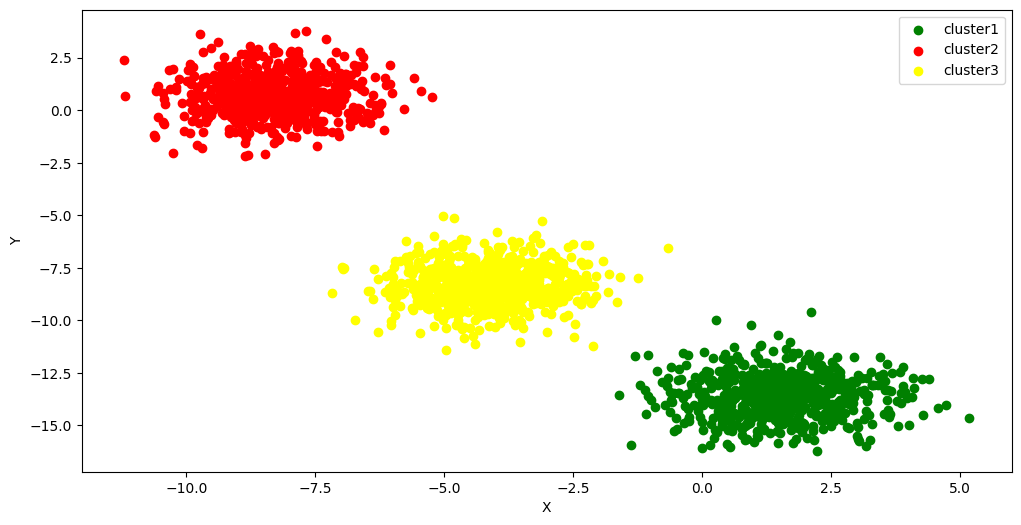

In [17]:
plt.scatter(df1.X, df1['Y'], color='green', label='cluster1')
plt.scatter(df2.X, df2['Y'], color='red', label='cluster2')
plt.scatter(df3.X, df3['Y'], color='yellow', label='cluster3')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [18]:
Kmean.cluster_centers_

array([[  1.52419272, -13.5935043 ],
       [ -8.31217971,   0.69225267],
       [ -4.12693297,  -8.27316   ]])

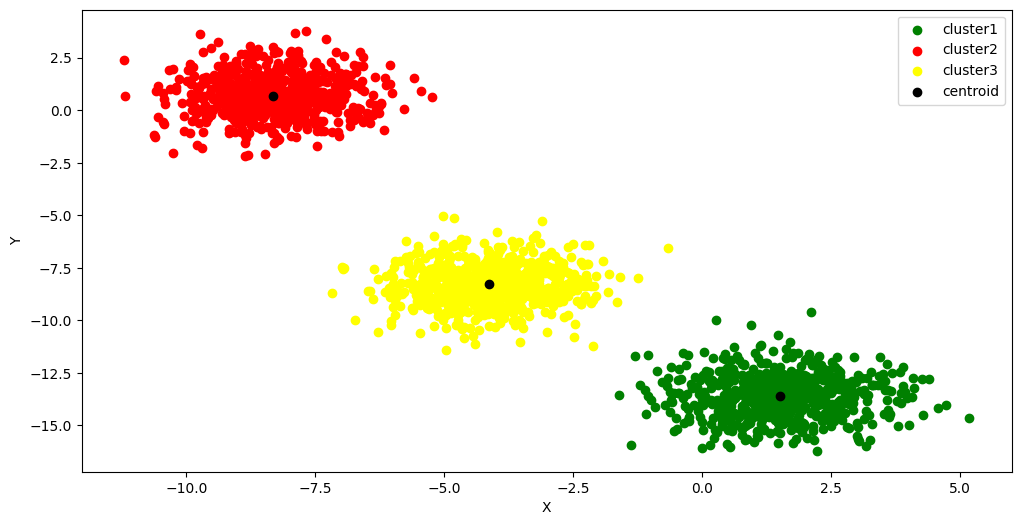

In [19]:
plt.scatter(df1.X, df1['Y'], color='green', label='cluster1')
plt.scatter(df2.X, df2['Y'], color='red', label='cluster2')
plt.scatter(df3.X, df3['Y'], color='yellow', label='cluster3')

# Correct the plotting of centroids
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:, 1], color='black', marker='o', label='centroid')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [20]:
import scikitplot as skplt

In [21]:
kmeans_elbow=KMeans()

<Axes: title={'center': 'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

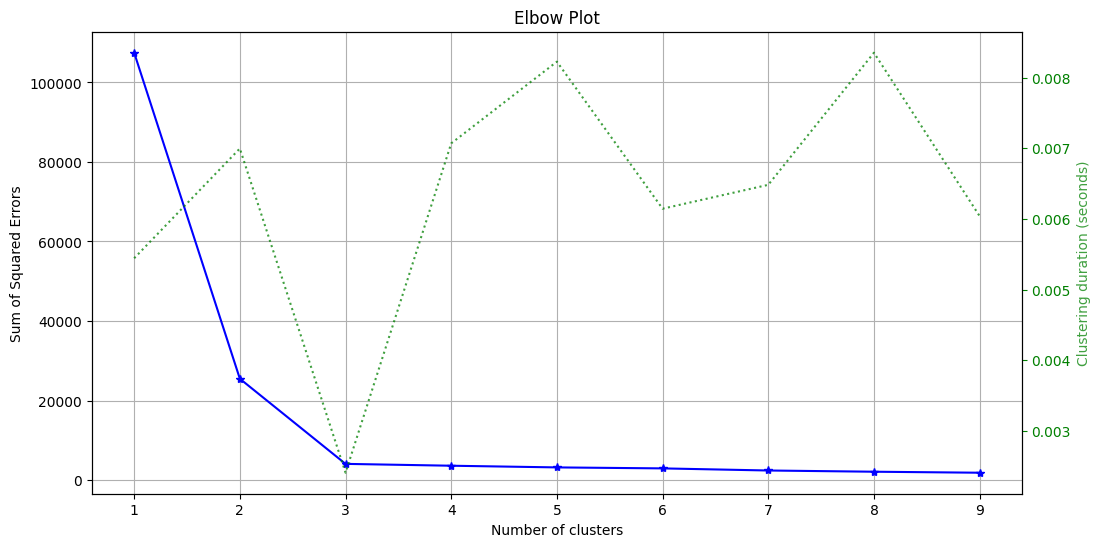

In [22]:
skplt.cluster.plot_elbow_curve(kmeans_elbow,X=cd,cluster_ranges=range(1,10))

In [23]:
cd2=pd.read_csv('clustering_data_2.csv')

In [24]:
cd2.head()

,X,Y
0,-0.472231,0.036999
1,-0.160415,-0.448140
2,-0.521661,0.904800
3,-0.986056,-0.347668
4,-0.068556,0.986253


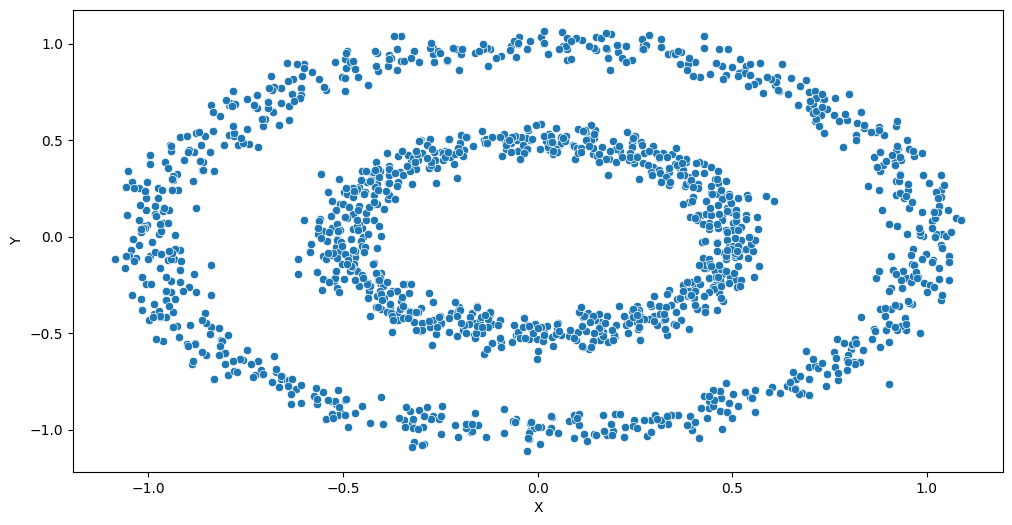

In [25]:
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(x='X',y='Y',data=cd2)
plt.show()

In [26]:
Kmean=KMeans(n_clusters=2)

In [27]:

Kmean.fit(cd)

KMeans(n_clusters=2)

In [28]:
cluster_assignment = cluster_assignment[:len(cd2)]


In [29]:
print(len(cd2), len(cluster_assignment))  # Ensure both lengths match


1500 1500


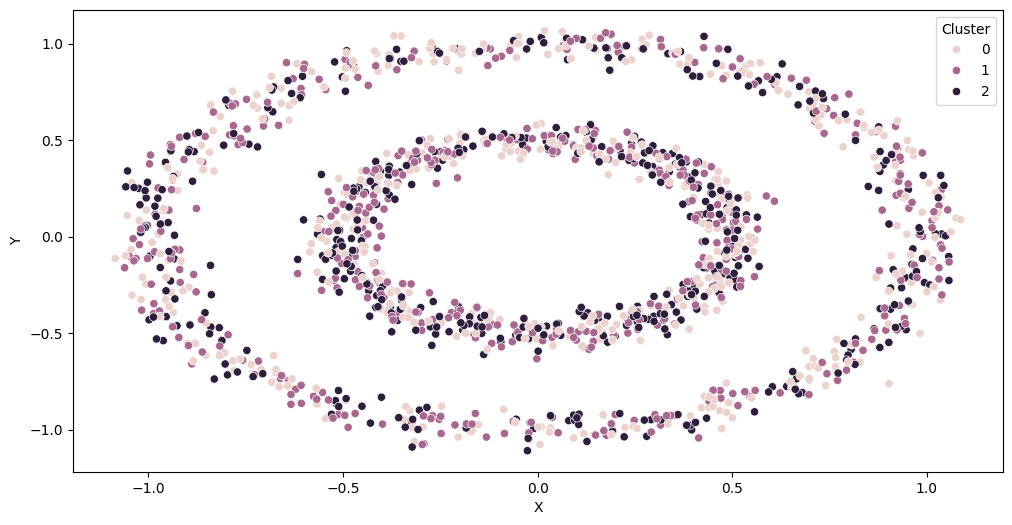

In [30]:
# Ensure the lengths of cd2 and cluster_assignment match
if len(cluster_assignment) != len(cd2):
    cluster_assignment = cluster_assignment[:len(cd2)]  # Trim to match cd2 length

# Now plot
sns.scatterplot(x=cd2['X'], y=cd2['Y'], hue=cluster_assignment)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Cluster')
plt.show()


In [31]:
from sklearn.cluster import SpectralClustering


In [39]:
clus=SpectralClustering(n_clusters=2,affinity='nearest_neighbors')

In [40]:
clus.fit(cd2)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [34]:
cluster_assignment=clus.labels_

In [35]:
cluster_assignment

array([0, 0, 1, ..., 1, 1, 0])

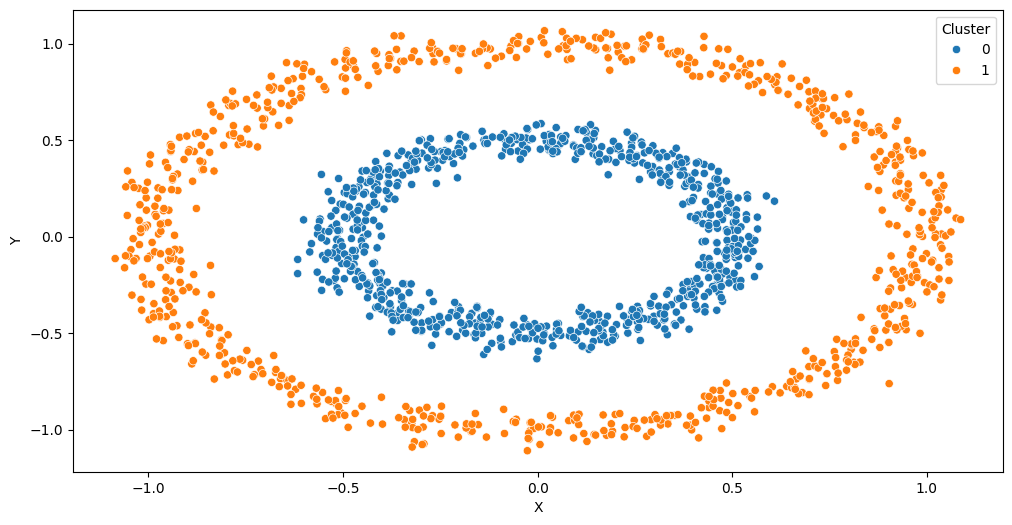

In [36]:
# Ensure the lengths of cd2 and cluster_assignment match
if len(cluster_assignment) != len(cd2):
    cluster_assignment = cluster_assignment[:len(cd2)]  # Trim to match cd2 length

# Now plot
sns.scatterplot(x=cd2['X'], y=cd2['Y'], hue=cluster_assignment)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Cluster')
plt.show()

### cluster the olivetti faces dataset
#### this classic olivetti face dataset contains 400 greyscale 64X64 pixel imagine of faces each image is flattened to a  1D vector of size 4096,40 different people were photographed , 40 times of each and ususa task i sto train model 

In [41]:
from sklearn.datasets import fetch_olivetti_faces

In [42]:
olivetti=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\hp\scikit_learn_data


In [43]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [44]:
olivetti.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and\nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position\n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n=================   ==================

In [45]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

### split it into a trainning set,validation set and test set.........the dataset is already scaled (0 and 1)since the dataset is quite small 

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

In [47]:
strat_split = StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=40)

In [48]:
train_valid_idx,test_idx=next(strat_split.split(olivetti.data,olivetti.target))

In [50]:
X_train_valid=olivetti.data[train_valid_idx]

In [51]:
Y_train_valid=olivetti.target[train_valid_idx]

In [52]:
X_train_valid

array([[0.6487603 , 0.6322314 , 0.70247936, ..., 0.09504132, 0.0785124 ,
        0.0785124 ],
       [0.40495867, 0.45454547, 0.5       , ..., 0.74380165, 0.73140496,
        0.70247936],
       [0.10330579, 0.12809917, 0.23140496, ..., 0.24380165, 0.2520661 ,
        0.3553719 ],
       ...,
       [0.3553719 , 0.4090909 , 0.5       , ..., 0.2768595 , 0.38016528,
        0.42975205],
       [0.1983471 , 0.29752067, 0.47933885, ..., 0.18181819, 0.21487603,
        0.22727273],
       [0.42975205, 0.4752066 , 0.5206612 , ..., 0.3553719 , 0.39256197,
        0.37603307]], dtype=float32)

In [53]:
X_test = olivetti.data[test_idx]
Y_test=olivetti.target[test_idx]

In [54]:
strat_split = StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=40)

In [56]:
train_idx,valid_idx = next(strat_split.split(X_train_valid,Y_train_valid))

In [58]:
X_train = X_train_valid[train_idx]
Y_train = Y_train_valid[train_idx]

In [59]:
X_valid=X_train_valid[valid_idx]
Y_valid=Y_train_valid[valid_idx]

In [60]:
print(X_train.shape,Y_train.shape)
print(X_valid.shape,Y_valid.shape)
print(X_test.shape,Y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [61]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(0.99)
X_train_pca=pca.fit_transform(X_train)
X_valid_pca=pca.transform(X_valid)
X_test_pca=pca.transform(X_test)

In [64]:
pca.n_components_

199

In [73]:
k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    print("k={}".format(k))
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


In [74]:
from sklearn.metrics import silhouette_score

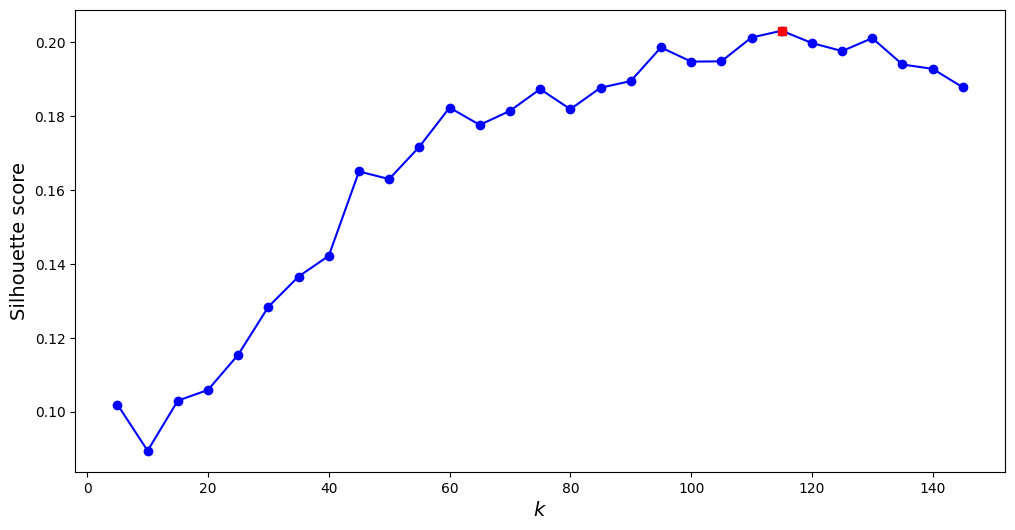

In [76]:
silhouette_scores = [silhouette_score(X_train_pca,model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k=k_range[best_index]
best_scores=silhouette_scores[best_index]

plt.plot(k_range,silhouette_scores, 'bo-')
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.plot(best_k,best_scores,'rs')
plt.show()

In [77]:
best_k

115

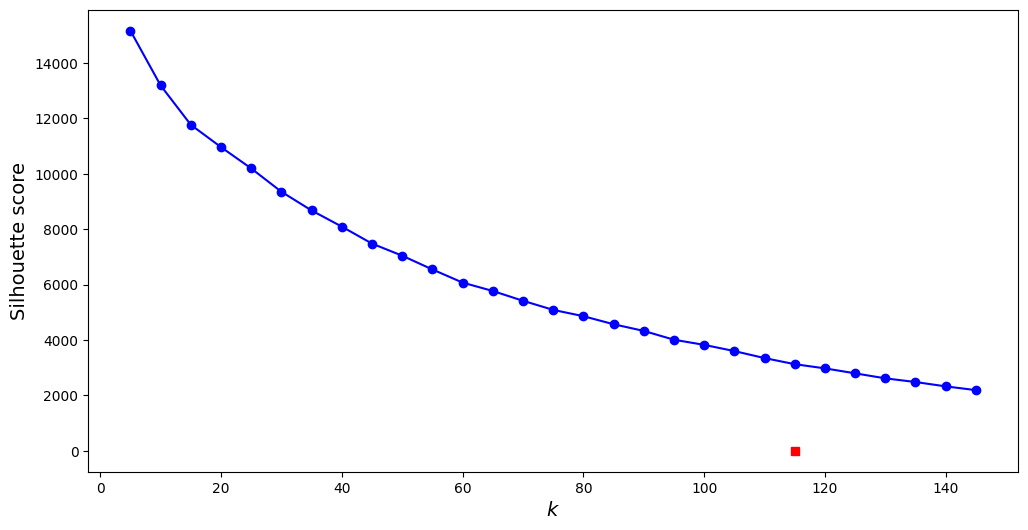

In [78]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia=inertias[best_index]
plt.plot(k_range,inertias,'bo-')
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.plot(best_k,best_scores,'rs')
plt.show()

In [79]:
best_model=kmeans_per_k[best_index]
best_model

KMeans(n_clusters=115, random_state=42)

In [87]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape((-1, 64, 64))
    n_rows=(len(faces)-1)//n_cols+1
    plt.figure(figsize=(n_cols, n_rows*1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(face, cmap='gray')
        plt.axis("off")
        plt.title(label)
    plt.show()

Cluster 0


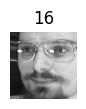

Cluster 1


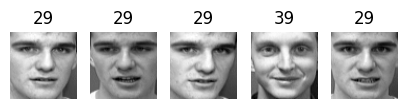

Cluster 2


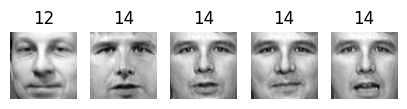

Cluster 3


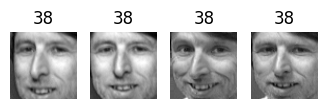

Cluster 4


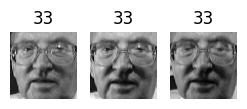

Cluster 5


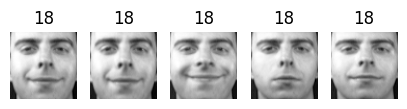

Cluster 6


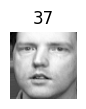

Cluster 7


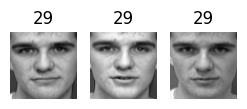

Cluster 8


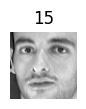

Cluster 9


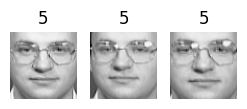

Cluster 10


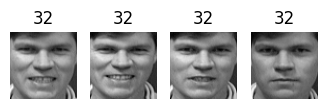

Cluster 11


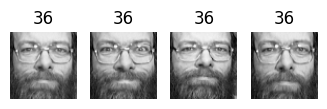

Cluster 12


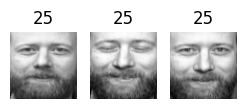

Cluster 13


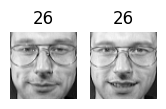

Cluster 14


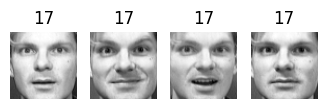

Cluster 15


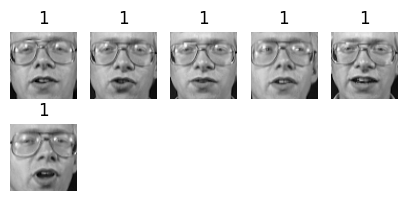

Cluster 16


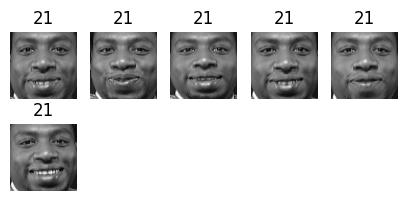

Cluster 17


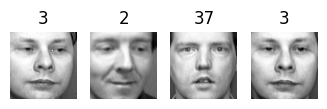

Cluster 18


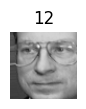

Cluster 19


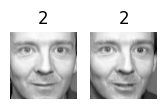

Cluster 20


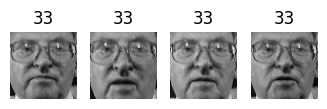

Cluster 21


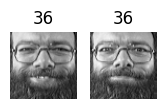

Cluster 22


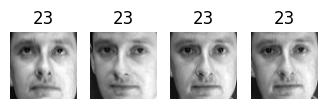

Cluster 23


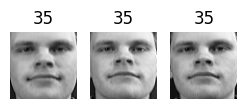

Cluster 24


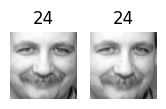

Cluster 25


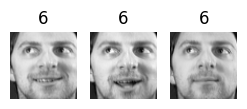

Cluster 26


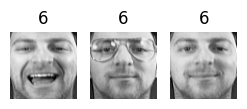

Cluster 27


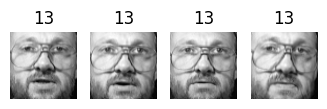

Cluster 28


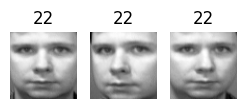

Cluster 29


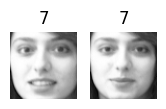

Cluster 30


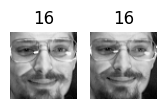

Cluster 31


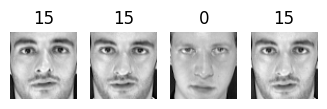

Cluster 32


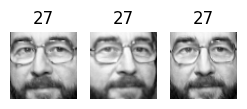

Cluster 33


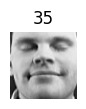

Cluster 34


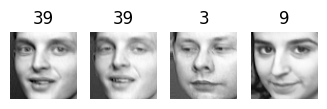

Cluster 35


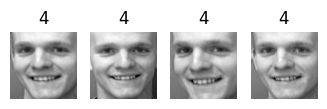

Cluster 36


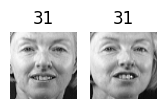

Cluster 37


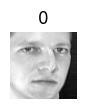

Cluster 38


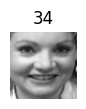

Cluster 39


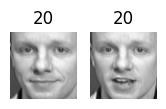

Cluster 40


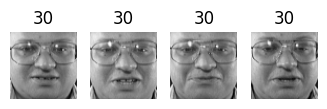

Cluster 41


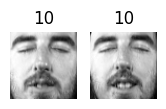

Cluster 42


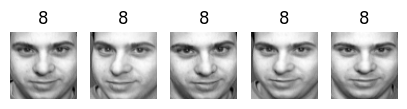

Cluster 43


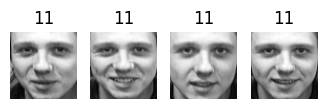

Cluster 44


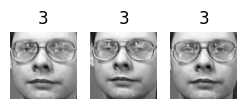

Cluster 45


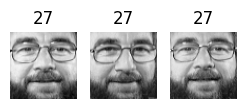

Cluster 46


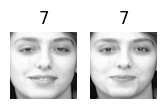

Cluster 47


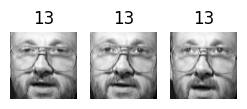

Cluster 48


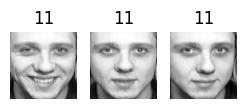

Cluster 49


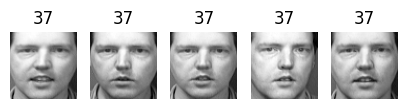

Cluster 50


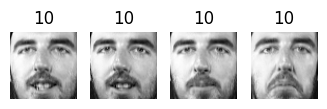

Cluster 51


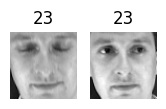

Cluster 52


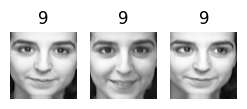

Cluster 53


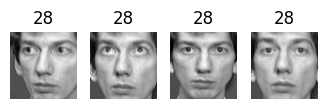

Cluster 54


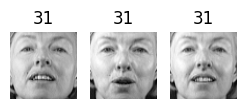

Cluster 55


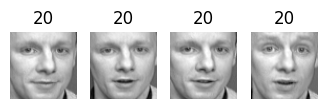

Cluster 56


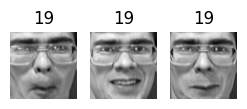

Cluster 57


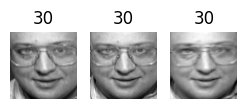

Cluster 58


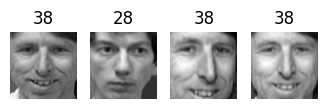

Cluster 59


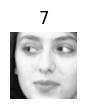

Cluster 60


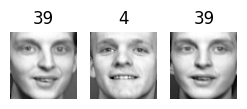

Cluster 61


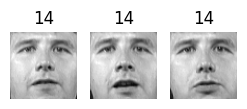

Cluster 62


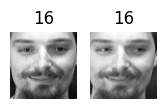

Cluster 63


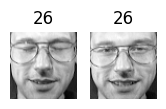

Cluster 64


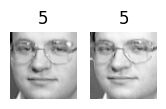

Cluster 65


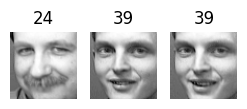

Cluster 66


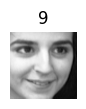

Cluster 67


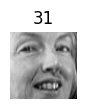

Cluster 68


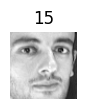

Cluster 69


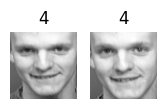

Cluster 70


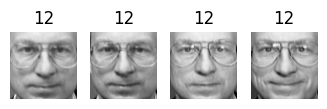

Cluster 71


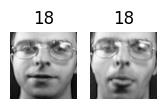

Cluster 72


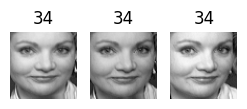

Cluster 73


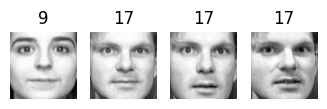

Cluster 74


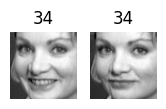

Cluster 75


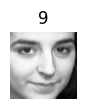

Cluster 76


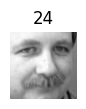

Cluster 77


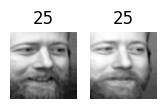

Cluster 78


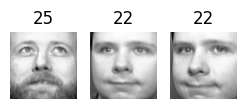

Cluster 79


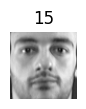

Cluster 80


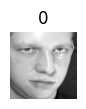

Cluster 81


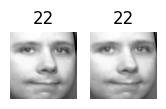

Cluster 82


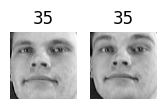

Cluster 83


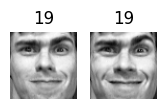

Cluster 84


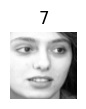

Cluster 85


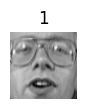

Cluster 86


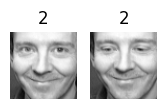

Cluster 87


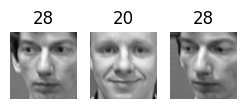

Cluster 88


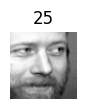

Cluster 89


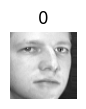

Cluster 90


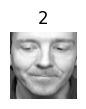

Cluster 91


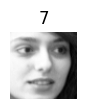

Cluster 92


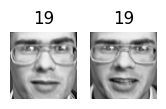

Cluster 93


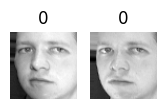

Cluster 94


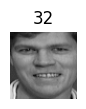

Cluster 95


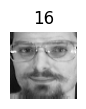

Cluster 96


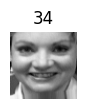

Cluster 97


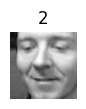

Cluster 98


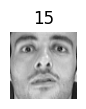

Cluster 99


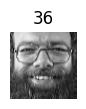

Cluster 100


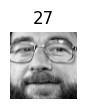

Cluster 101


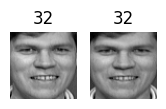

Cluster 102


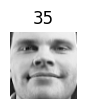

Cluster 103


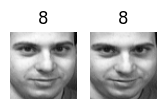

Cluster 104


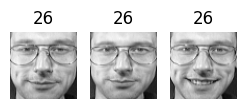

Cluster 105


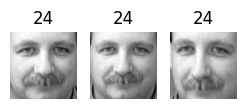

Cluster 106


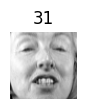

Cluster 107


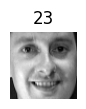

Cluster 108


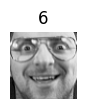

Cluster 109


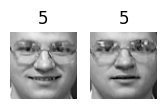

Cluster 110


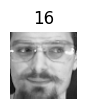

Cluster 111


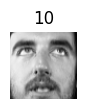

Cluster 112


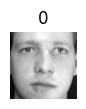

Cluster 113


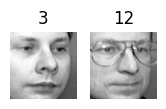

Cluster 114


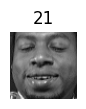

In [88]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster=best_model.labels_==cluster_id
    faces=X_train[in_cluster]
    labels=Y_train[in_cluster]
    plot_faces(faces, labels)